In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/post-processed.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/post-processed/Michael_Goldrich/Michael_Goldrich_0001_0000.jpg  
  inflating: /content/post-processed/Michael_Goldrich/Michael_Goldrich_0001_0001.jpg  
  inflating: /content/post-processed/Michael_Goldrich/Michael_Goldrich_0002_0000.jpg  
  inflating: /content/post-processed/Michael_Goldrich/Michael_Goldrich_0002_0001.jpg  
  inflating: /content/post-processed/Michael_Goldrich/Michael_Goldrich_0002_0002.jpg  
   creating: /content/post-processed/Michael_Hagee/
  inflating: /content/post-processed/Michael_Hagee/Michael_Hagee_0001_0000.jpg  
  inflating: /content/post-processed/Michael_Hagee/Michael_Hagee_0002_0000.jpg  
   creating: /content/post-processed/Michael_Haneke/
  inflating: /content/post-processed/Michael_Haneke/Michael_Haneke_0001_0000.jpg  
  inflating: /content/post-processed/Michael_Haneke/Michael_Haneke_0001_0001.jpg  
  inflating: /content/post-processed/Michael_Haneke/Michael_Haneke_0002_0000.jpg 

In [ ]:
train_dir = '/content/post-processed'

(112, 112, 3)

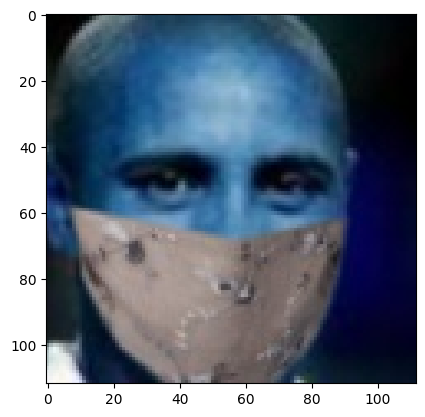

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("post-processed//Roberto_Carlos/Roberto_Carlos_0001_0000.jpg")
plt.imshow(img)
img.shape

In [ ]:
img_width = 112
img_height = 112
batch_size = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 10858 images belonging to 2996 classes.
Found 1142 images belonging to 2996 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2996, activation='softmax'))
model.add(Dropout(0.5))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
340/340 [==============================] - 275s 801ms/step - loss: 11.6113 - accuracy: 0.0046 - val_loss: 7.4356 - val_accuracy: 0.0271
Epoch 2/10
340/340 [==============================] - 266s 782ms/step - loss: 11.3435 - accuracy: 0.0468 - val_loss: 6.1353 - val_accuracy: 0.1690
Epoch 3/10
340/340 [==============================] - 287s 843ms/step - loss: 10.5021 - accuracy: 0.1513 - val_loss: 4.5569 - val_accuracy: 0.4159
Epoch 4/10
340/340 [==============================] - 268s 788ms/step - loss: 9.7318 - accuracy: 0.2588 - val_loss: 3.6775 - val_accuracy: 0.5359
Epoch 5/10
340/340 [==============================] - 264s 776ms/step - loss: 9.1148 - accuracy: 0.3489 - val_loss: 3.1530 - val_accuracy: 0.6173
Epoch 6/10
340/340 [==============================] - 264s 775ms/step - loss: 8.7049 - accuracy: 0.4060 - val_loss: 2.9249 - val_accuracy: 0.6786
Epoch 7/10
340/340 [==============================] - 265s 778ms/step - loss: 8.4047 - accuracy: 0.4444 - val_loss: 2.827

In [ ]:
from tensorflow.keras.models import Model

# Modelo até a camada intermediária que gera os vetores descritores
feature_extractor_model = Model(inputs=model.input, outputs=model.get_layer(index=-2).output)

In [ ]:
import os
import numpy as np

# Função para extrair vetores descritores para uma imagem
def extract_descriptor(image_path):
    img = cv.imread(image_path)
    img = cv.resize(img, (img_width, img_height))
    img = img / 255.0  # Normalizar
    img = np.expand_dims(img, axis=0)  # Adicionar dimensão de lote
    descriptor = feature_extractor_model.predict(img)
    return descriptor.flatten()

# Diretório do conjunto de dados
dataset_dir = '/content/post-processed'

# Dicionário para armazenar vetores descritores por classe
descriptor_database = {}

# Percorrer cada classe no conjunto de dados
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    descriptors = []

    # Percorrer cada imagem da classe
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        descriptor = extract_descriptor(img_path)
        descriptors.append(descriptor)

    # Armazenar vetores descritores da classe no dicionário
    descriptor_database[class_name] = descriptors

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 36ms/step


In [ ]:
# Caminho da nova foto
new_image_path = '/content/drive/MyDrive/ReconhecimentoFacial/Gabriel_01.jpg'

# Extrair vetor descritor para a nova foto
new_descriptor = extract_descriptor(new_image_path)

1/1 [==============================] - 0s 54ms/step


In [ ]:
# Caminho da nova foto
new_image_path2 = '/content/drive/MyDrive/ReconhecimentoFacial/Gabriel_02.jpg'
new_image_path3 = '/content/drive/MyDrive/ReconhecimentoFacial/Gabriel_03.jpg'


# Extrair vetor descritor para a nova foto
new_descriptor2 = extract_descriptor(new_image_path2)
new_descriptor3 = extract_descriptor(new_image_path3)

1/1 [==============================] - 0s 34ms/step


In [ ]:
# Nome da classe para a nova foto
new_class_name = 'Gabriel'

# Adicionar o vetor descritor ao banco de dados
if new_class_name not in descriptor_database:
    descriptor_database[new_class_name] = []

# Adicionar o vetor descritor da nova foto à classe correspondente
descriptor_database[new_class_name].append(new_descriptor)
descriptor_database[new_class_name].append(new_descriptor2)
descriptor_database[new_class_name].append(new_descriptor3)

In [ ]:
from IPython.display import Image, display

def euclidean_distance(descriptor1, descriptor2):
    return np.linalg.norm(descriptor1 - descriptor2)

# Função para realizar o reconhecimento facial e exibir a imagem
def recognize_face_and_show_image(descriptor, image_path, threshold=0.6):
    best_match = None
    min_distance = float('inf')

    # Percorrer todas as classes no banco de dados
    for class_name, descriptors in descriptor_database.items():
        for stored_descriptor in descriptors:
            distance = euclidean_distance(descriptor, stored_descriptor)

            # Atualizar a melhor correspondência se a distância for menor que o limite
            if distance < min_distance:
                min_distance = distance
                best_match = class_name

    # Verificar se a melhor correspondência está abaixo do limite
    if min_distance < threshold:
        result = best_match
    else:
        result = "Desconhecido"

    # Exibir a imagem com o resultado
    display(Image(filename=image_path))
    print(f"Resultado do Reconhecimento Facial: {result}")

In [ ]:
def recognize_face_and_return_scores(descriptor, threshold=0.6, k=5):
    scores = []

    # Percorrer todas as classes no banco de dados
    for class_name, descriptors in descriptor_database.items():
        for stored_descriptor in descriptors:
            distance = euclidean_distance(descriptor, stored_descriptor)
            scores.append((class_name, distance))

    # Ordenar os resultados com base na distância (score)
    scores.sort(key=lambda x: x[1])

    # Selecionar os k melhores resultados
    top_k_results = scores[:k]

    # Verificar se o melhor resultado está abaixo do limite
    best_match = top_k_results[0][0]
    min_distance = top_k_results[0][1]
    if min_distance < threshold:
        result = best_match
    else:
        result = "Desconhecido"

    return result, scores[:k]

1/1 [==============================] - 0s 110ms/step


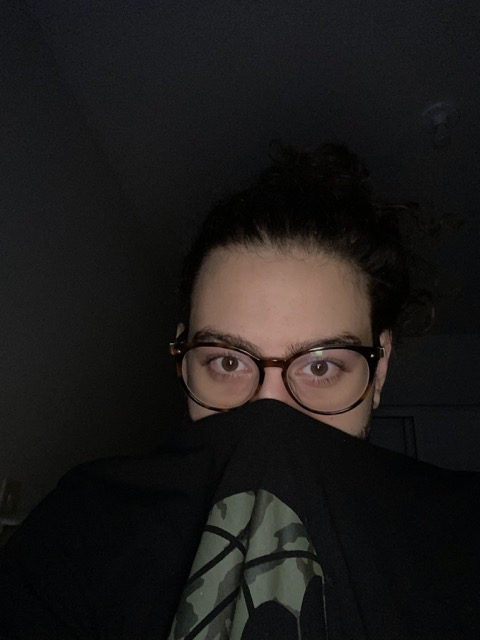

Resultado do Reconhecimento Facial: Gabriel

Top 5 Melhores Resultados:
1. Classe: Gabriel, Score: 0.2032400667667389
2. Classe: Patty_Schnyder, Score: 0.24521684646606445
3. Classe: Hank_Aaron, Score: 0.24680417776107788
4. Classe: Colin_Montgomerie, Score: 0.2520865201950073
5. Classe: Jean-Claude_Braquet, Score: 0.25439444184303284


In [ ]:
new_image_path = '/content/drive/MyDrive/ReconhecimentoFacial/Gabriel_test.jpg'

# Extrair vetor descritor para a nova imagem
new_descriptor = extract_descriptor(new_image_path)

# Realizar o reconhecimento facial na nova imagem
result, top_k_scores = recognize_face_and_return_scores(new_descriptor)

# Exibir a imagem com o resultado e os k melhores scores
display(Image(filename=new_image_path))
print(f"Resultado do Reconhecimento Facial: {result}")

# Exibir a lista dos k melhores scores
print(f"\nTop {len(top_k_scores)} Melhores Resultados:")
for i, (class_name, score) in enumerate(top_k_scores, start=1):
    print(f"{i}. Classe: {class_name}, Score: {score}")